## What is Attrition?

Attrition in HR refers to the gradual reduction of employees in a company when employees leave and their roles remain unfilled for a sustained period, causing a shrink in total workforce. This can happen due to resignations, retirements, terminations, or other exits. Unlike turnover, which counts all separations regardless of replacement, attrition specifically tracks the positions that are not refilled, leading to a decrease in headcount.

---

## Project Objectives

- Identify key factors that influence employee attrition in the organization.
- Predict which employees are at high risk of leaving the company.
- Analyze the impact of job satisfaction, workload, and work environment on employee retention.
- Segment employees based on attrition risk and recommend targeted retention strategies.
- Evaluate the relationship between employee performance and attrition.
- Investigate demographic factors such as age, gender, and tenure that correlate with turnover.

---

## Measurable Success Criteria (KPIs)

- Achieve a predictive model accuracy of at least 80% in classifying attrition status.
- Identify top 5 features that most strongly influence attrition for targeted interventions.
- Reduce false negatives (employees predicted not to leave but actually leave) to below 10%.
- Generate actionable insights leading to at least a 10% reduction in attrition within high-risk groups over 6 months (hypothetical).
- Create a dashboard that summarizes attrition trends by department, job role, and satisfaction levels.
- Provide segmentation that captures at least 70% of employees likely to leave within the next year.


# EDA

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
df = pd.read_csv('/kaggle/input/hr-analytics-prediction/HR-Employee-Attrition.csv')

In [3]:
# Inspect data
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

**No Missing Data**: All columns have 1470 non-null entries, so you do not need missing value imputation. This is ideal for further analysis.

# Statistical Analysis

In [6]:
# Summary statistics
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}: {df[col].nunique()} unique values")

Attrition: 2 unique values
BusinessTravel: 3 unique values
Department: 3 unique values
EducationField: 6 unique values
Gender: 2 unique values
JobRole: 9 unique values
MaritalStatus: 3 unique values
Over18: 1 unique values
OverTime: 2 unique values


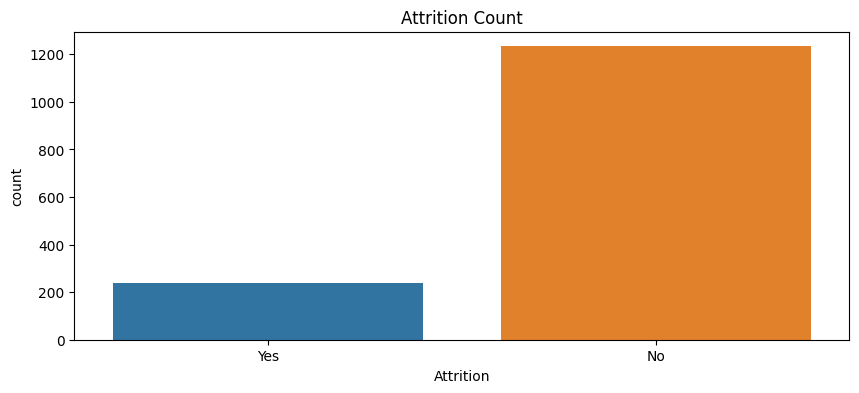

In [8]:
# Univariate analysis
plt.figure(figsize=(10,4))
sns.countplot(x='Attrition', data=df)
plt.title('Attrition Count')
plt.show()

**Class Imbalance**: The attrition count plot shows that far fewer employees left ("Yes") compared to those who stayed ("No"), indicating a class imbalance. This may affect predictive modeling and require techniques such as oversampling or class-weight adjustment.

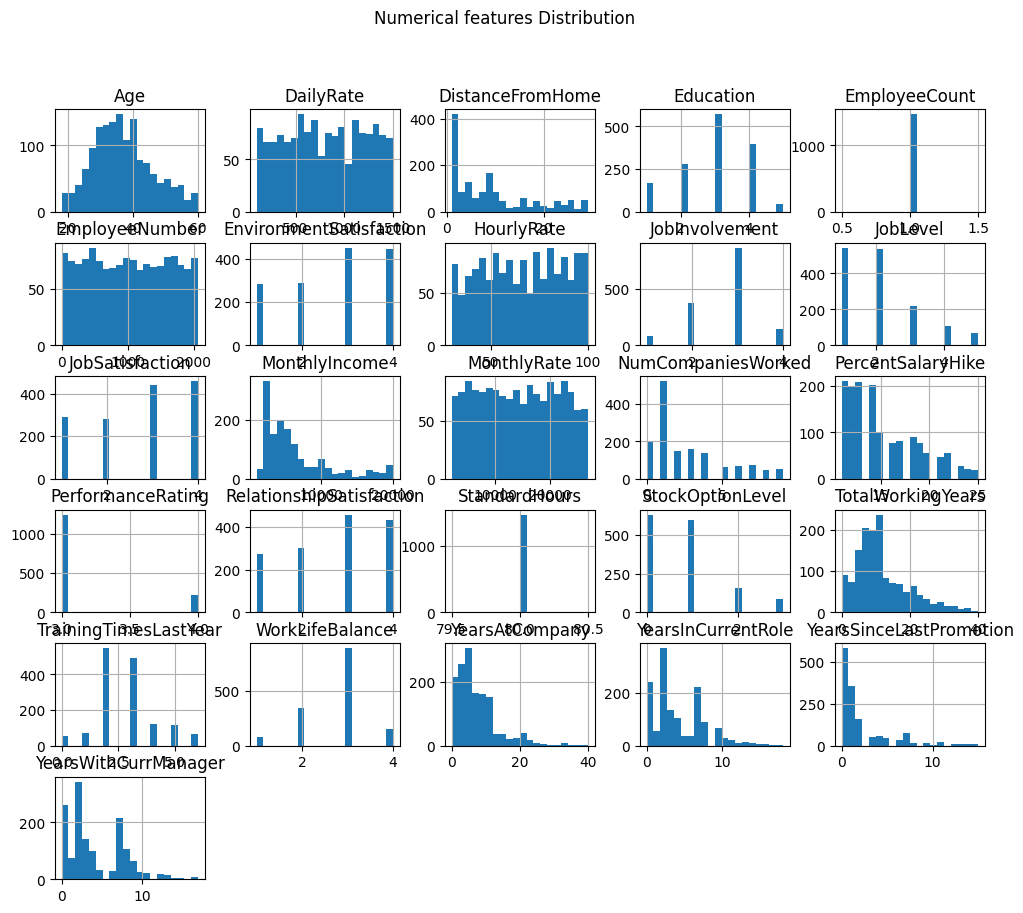

In [9]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols].hist(figsize=(12, 10), bins=20)
plt.suptitle('Numerical features Distribution')
plt.show()

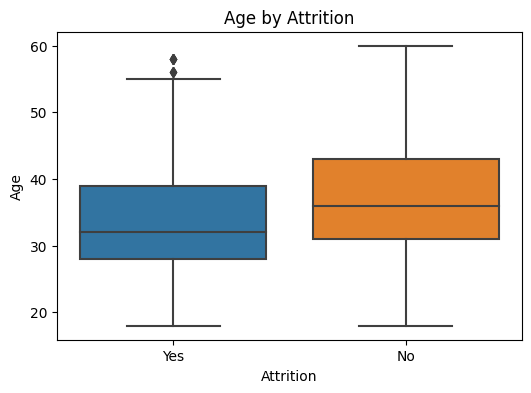

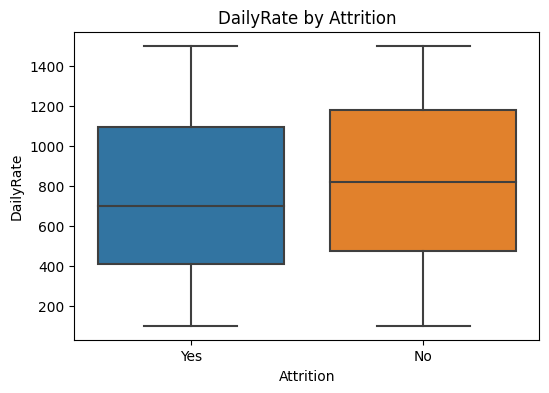

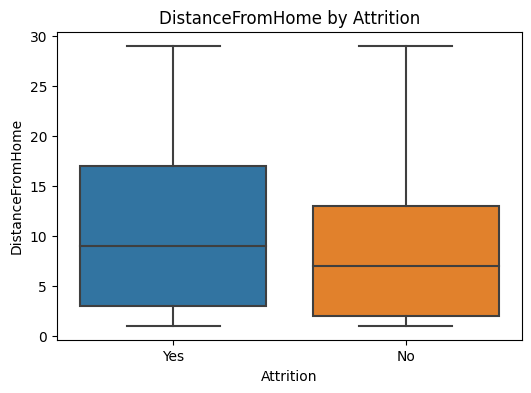

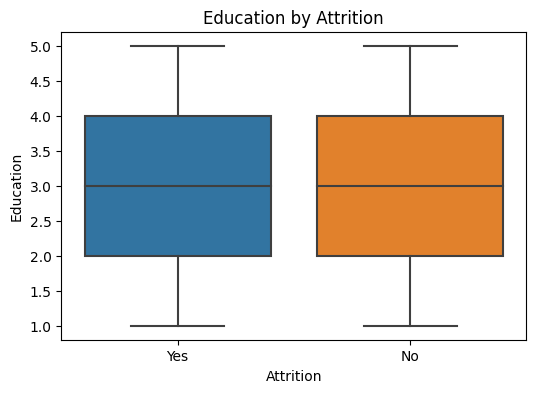

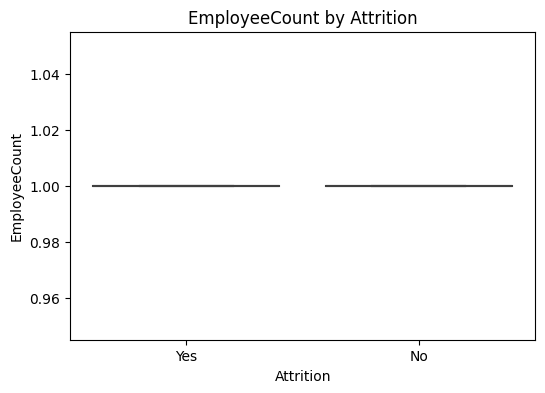

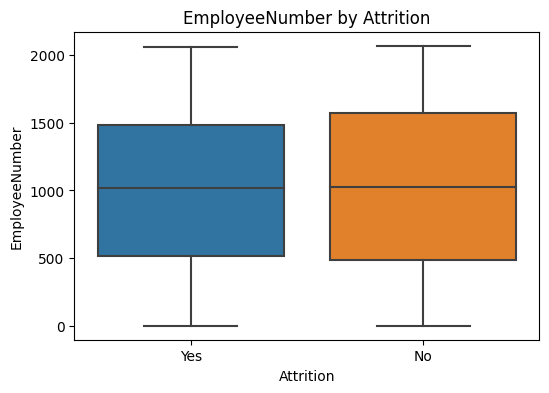

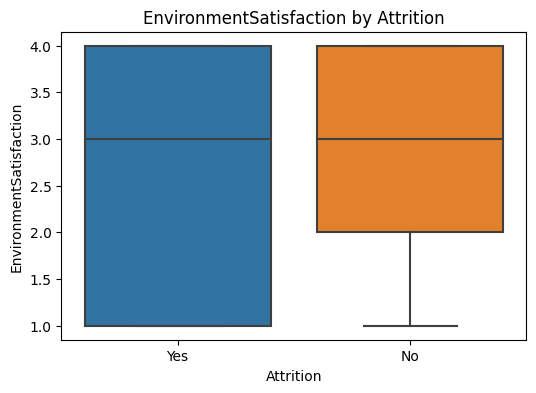

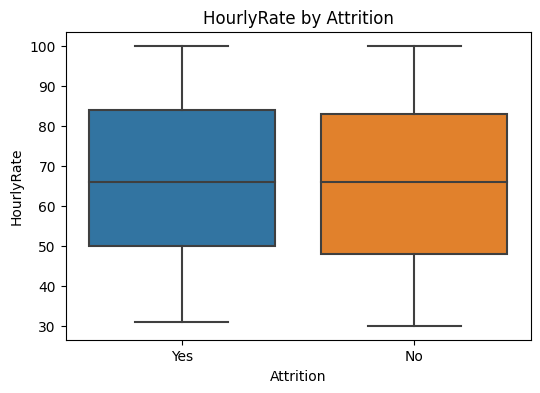

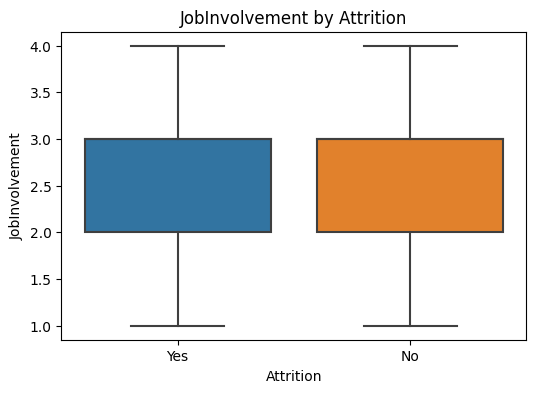

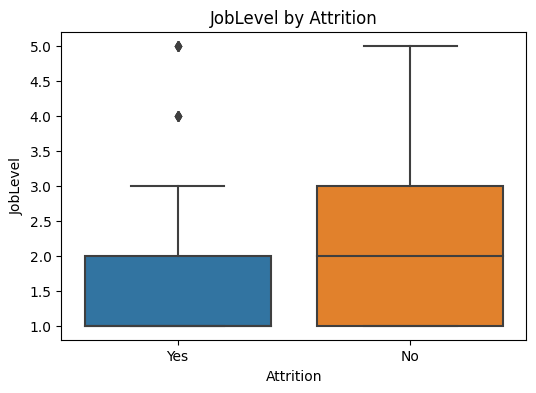

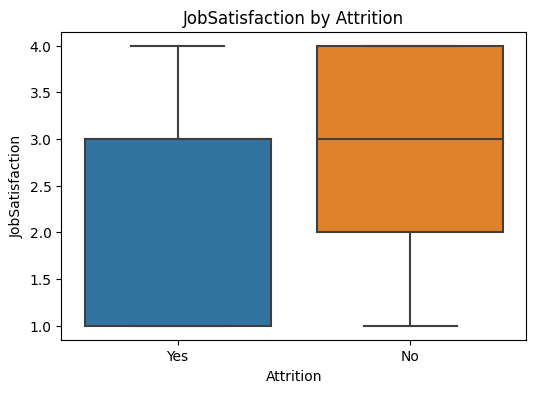

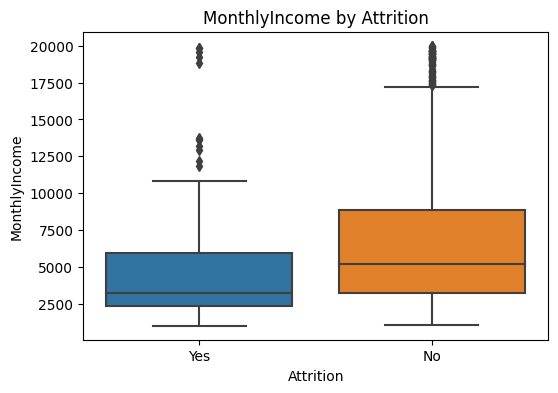

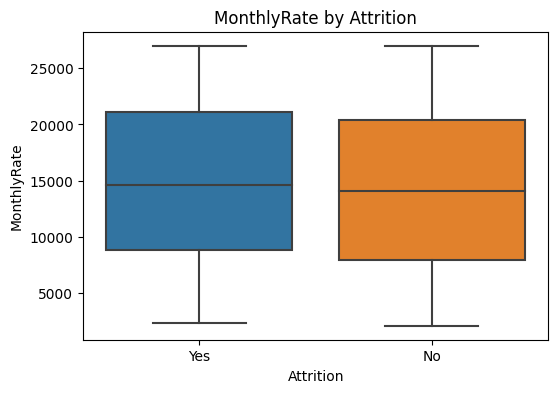

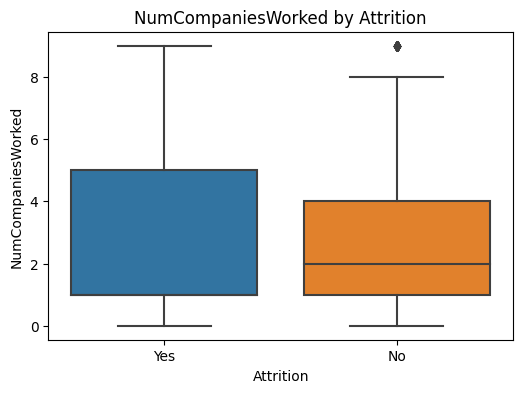

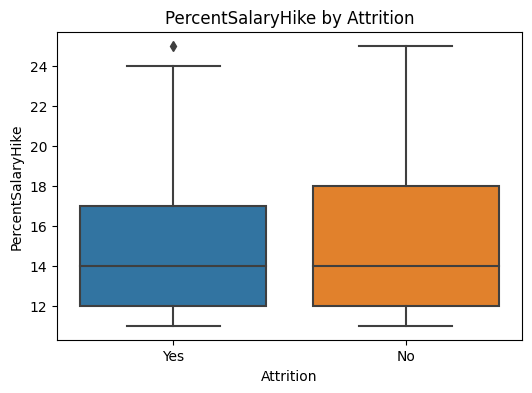

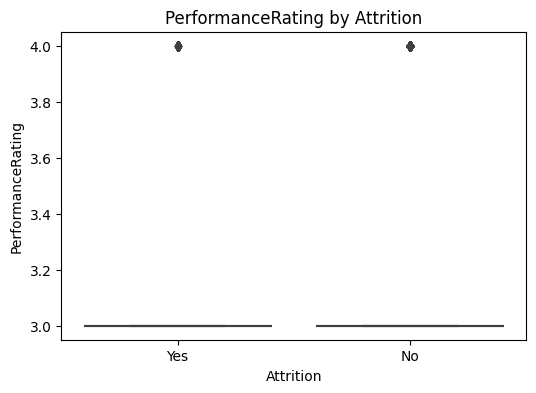

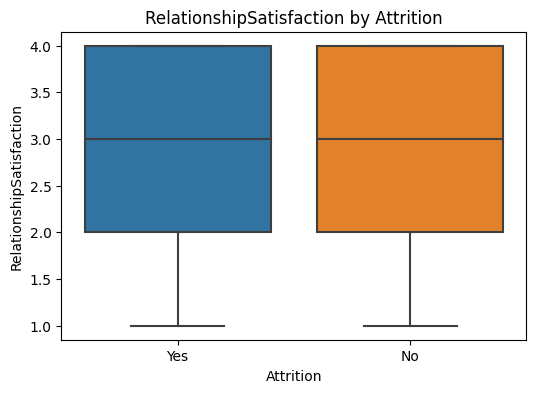

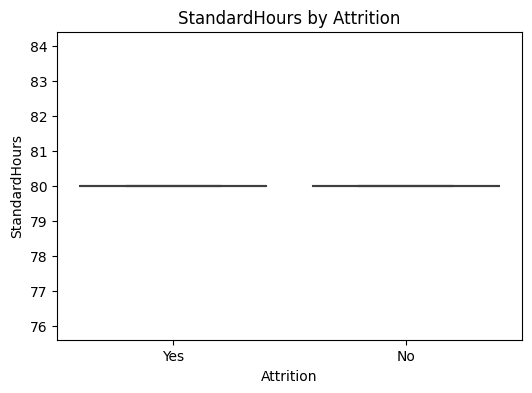

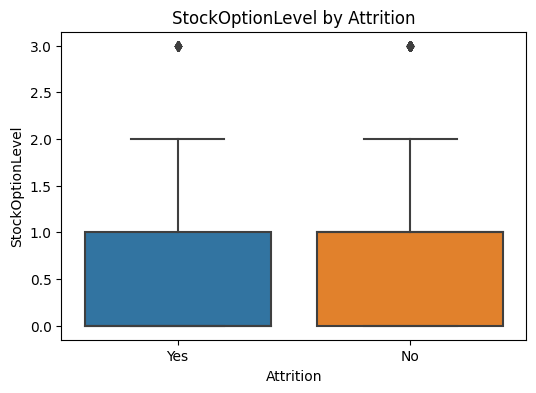

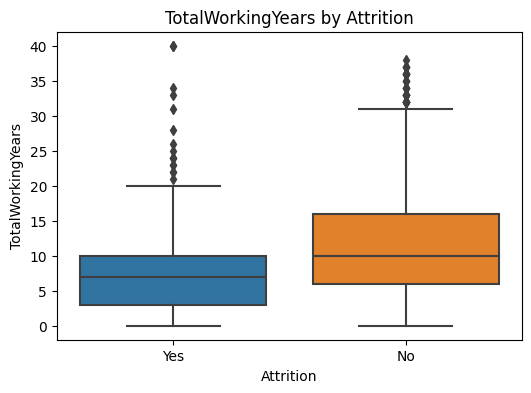

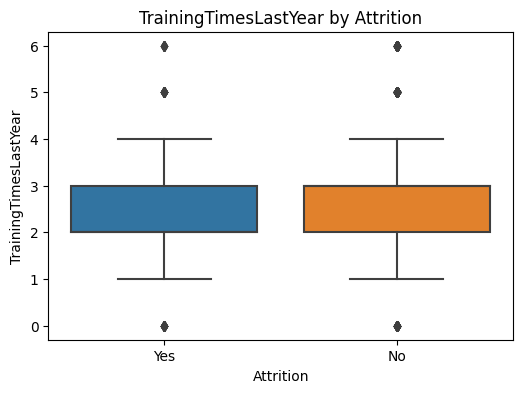

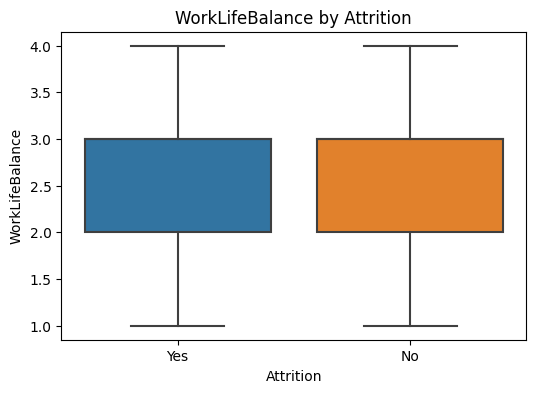

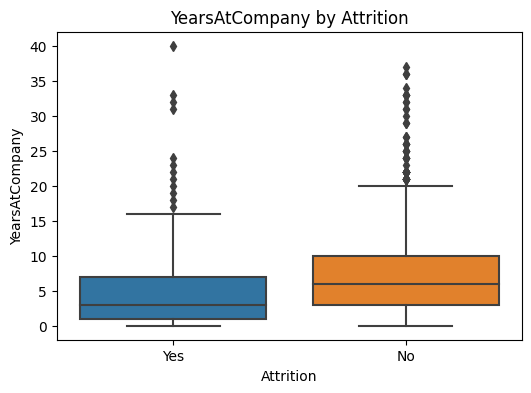

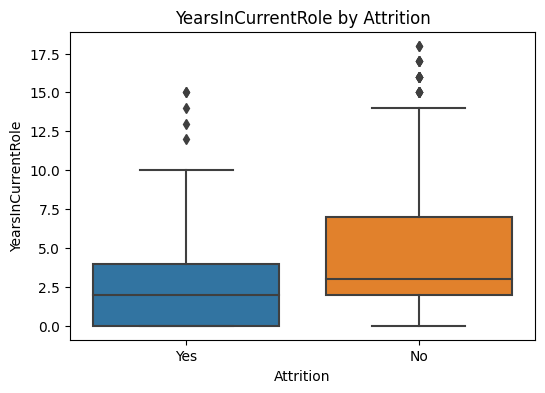

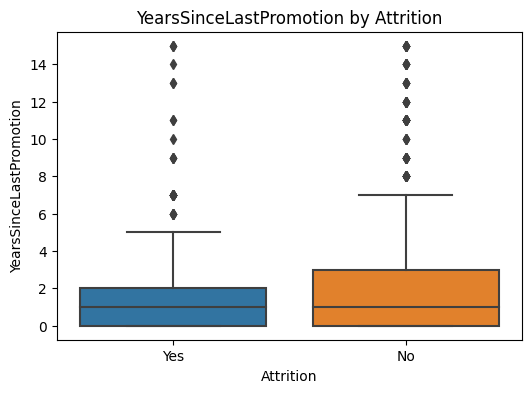

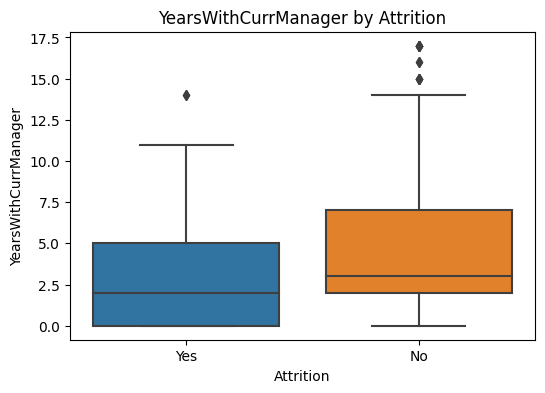

In [10]:
# Bivariate Analysis - numerical features vs Attrition
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Attrition', y=col, data=df)
    plt.title(f"{col} by Attrition")
    plt.show()

**Feature Distribution**: Histograms show that several features, like Age, MonthlyIncome, and YearsAtCompany, are skewed or have outliers, which may need transformation or careful handling.

## Analysis of Additional Attrition Factors

- **Total Working Years**: Employees who left the company had fewer cumulative years of work experience, suggesting less experienced employees are at higher risk of attrition.
- **Training Times Last Year**: Employees with higher attrition tended to receive fewer trainings, though the difference isn’t pronounced. Further analysis could reveal if targeted training improves retention.
- **Years in Current Role**: Employees who left were typically newer in their roles, indicating that adaptation to new responsibilities may impact attrition.
- **Years Since Last Promotion**: Lack of recent career advancement (longer since last promotion) correlates with higher attrition; career growth opportunities may help retention.
- **Years With Current Manager**: Shorter relationship duration with current manager is seen in leavers, highlighting the value of stable, supportive management for retention.
- **Number of Companies Worked**: More previously worked companies often means higher likelihood to leave, indicating that a pattern of mobility may predict future attrition.

These features provide actionable insights for HR interventions, such as mentoring for newer employees, career development programs, manager-employee relationship building, and targeted retention efforts for those with high job mobility backgrounds.


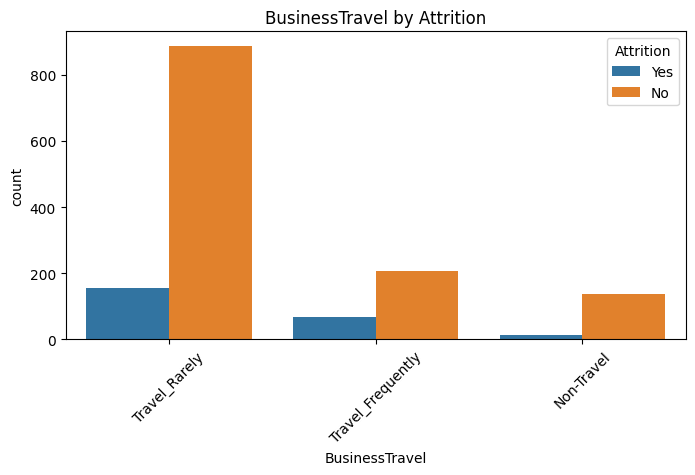

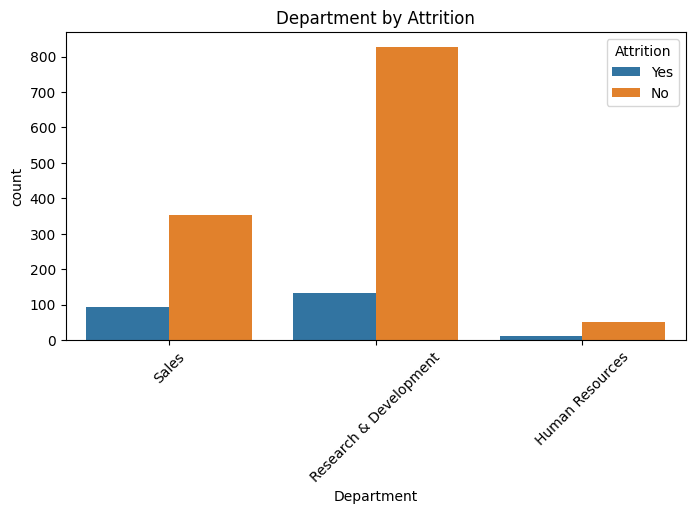

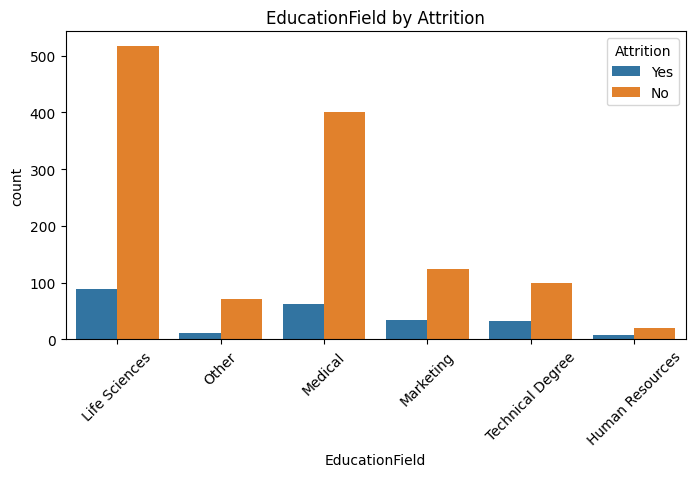

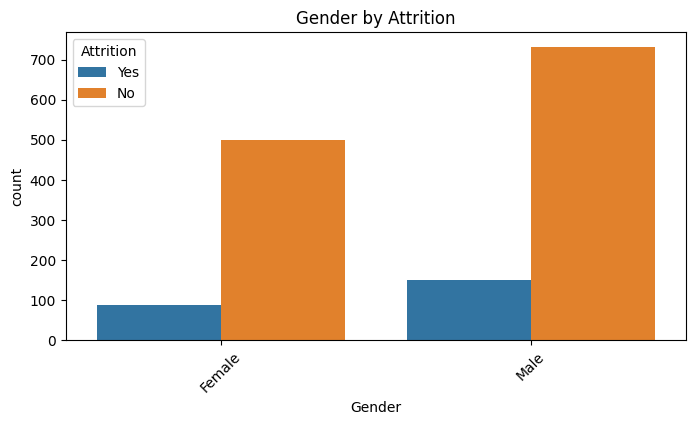

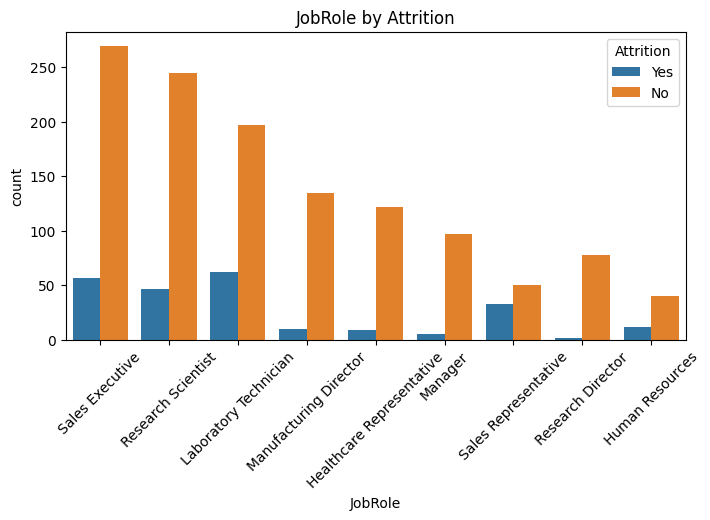

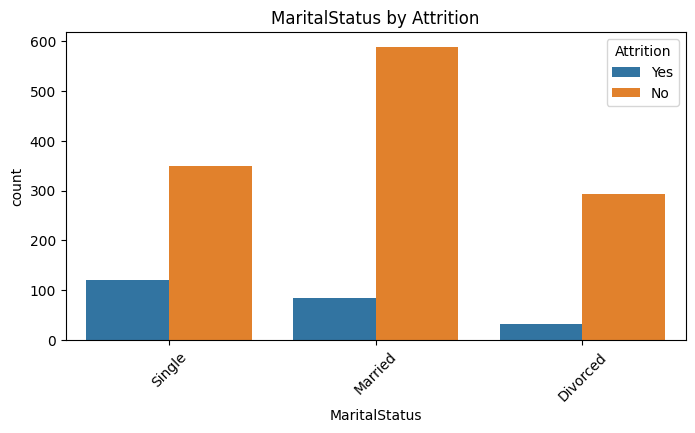

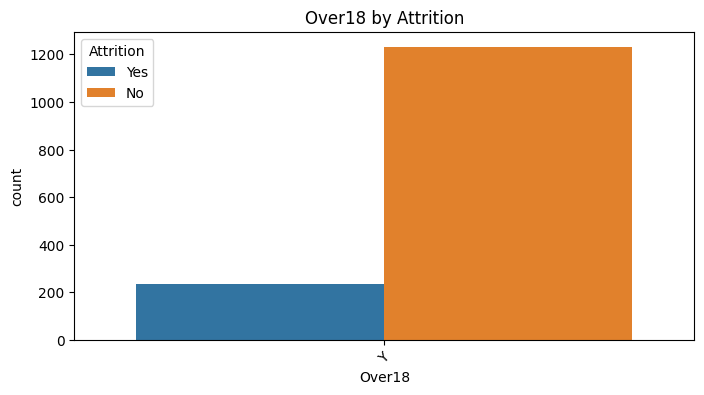

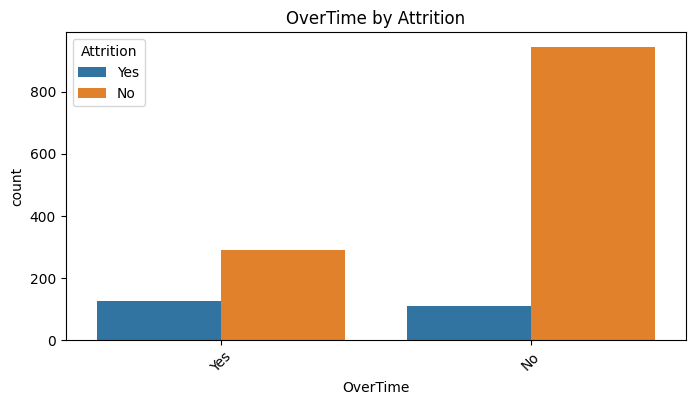

In [11]:
# Categorical features vs Attrition
cat_cols = df.select_dtypes(include=['object']).columns.drop('Attrition')
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, hue='Attrition', data=df)
    plt.title(f"{col} by Attrition")
    plt.xticks(rotation=45)
    plt.show()

**Categorical Diversity**: Features like BusinessTravel, Department, EducationField, JobRole, and MaritalStatus have varying numbers of categories, allowing for rich categorical analysis.

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


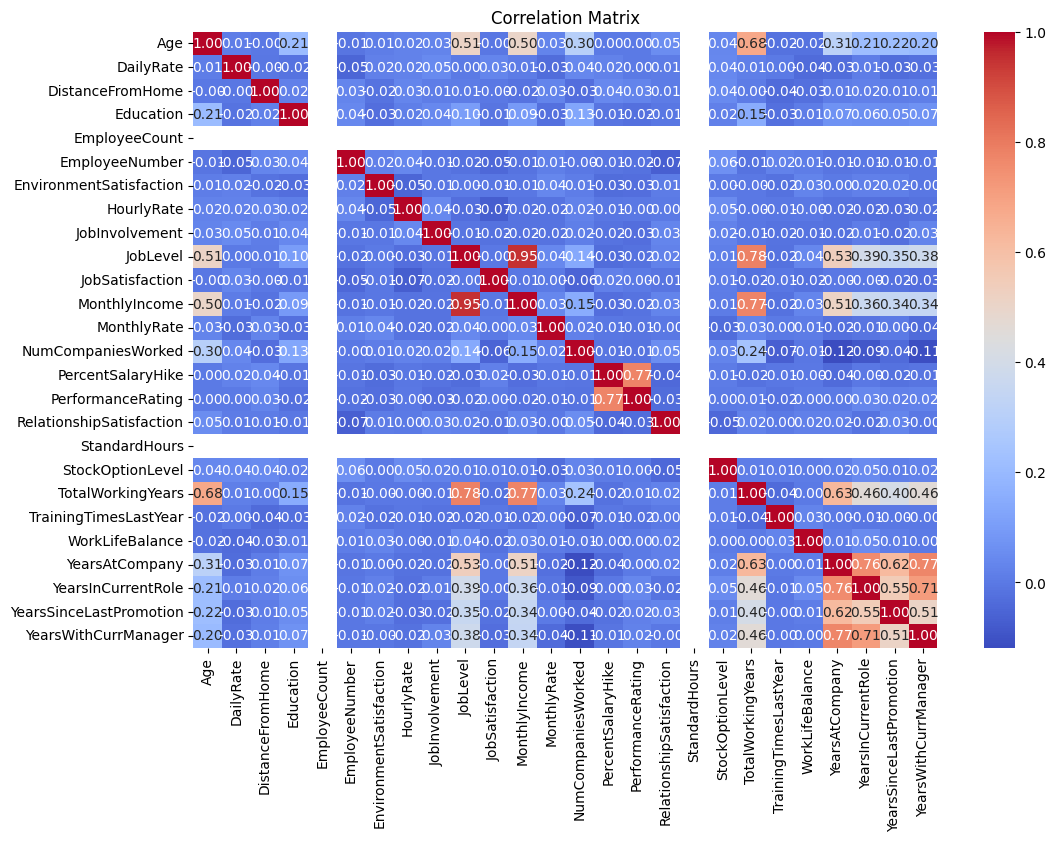

In [12]:
# Correlation Heatmap for numerical features
plt.figure(figsize=(12,8))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

**Correlation Matrix**: Most numeric features have low correlation with each other (as shown in your heatmap), which means multicollinearity is not a serious issue.

In [13]:
# Group-wise summary statistics for key features
df.groupby('Attrition')[['JobSatisfaction', 'YearsAtCompany', 'MonthlyIncome']].mean()

,JobSatisfaction,YearsAtCompany,MonthlyIncome
Attrition,,,
No,2.778589,7.369019,6832.739659
Yes,2.468354,5.130802,4787.092827


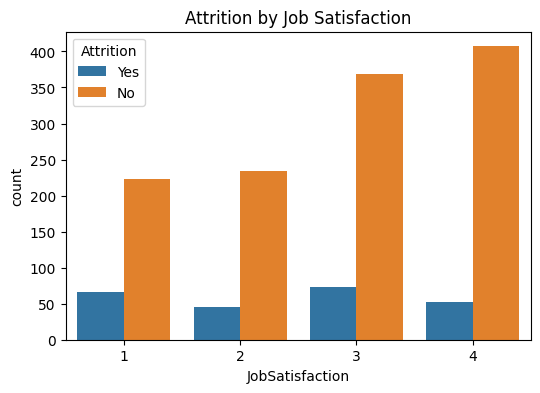

In [14]:
# JobSatisfaction vs Attrition
plt.figure(figsize=(6,4))
sns.countplot(x='JobSatisfaction', hue='Attrition', data=df)
plt.title('Attrition by Job Satisfaction')
plt.show()

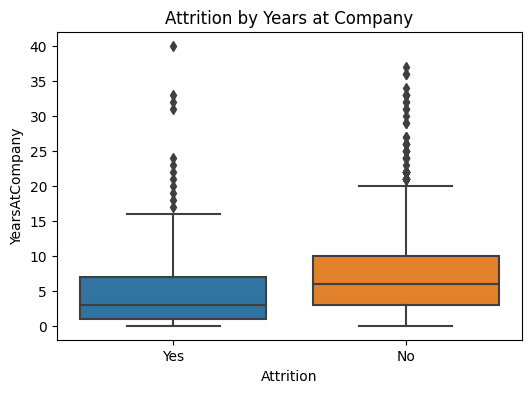

In [15]:
# YearsAtCOmpany vs Attrition
plt.figure(figsize=(6, 4))
sns.boxplot(x='Attrition', y='YearsAtCompany', data=df)
plt.title('Attrition by Years at Company')
plt.show()


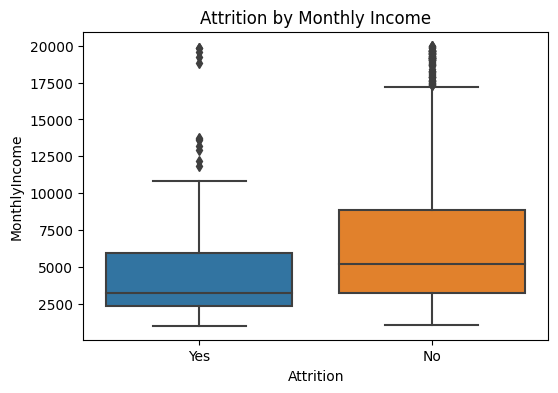

In [16]:
# MonthlyIncome vs Attrition 
plt.figure(figsize=(6, 4))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title('Attrition by Monthly Income')
plt.show()


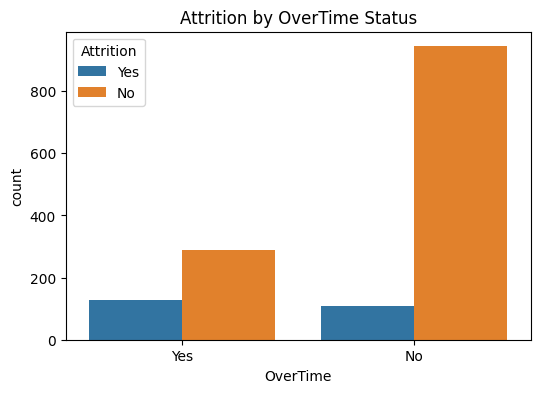

In [17]:
# OverTime vs Attrition
plt.figure(figsize=(6, 4))
sns.countplot(x='OverTime', hue='Attrition', data=df)
plt.title('Attrition by OverTime Status')
plt.show()

In [18]:
# mean attrition rate by each group
df.groupby('OverTime')['Attrition'].value_counts(normalize=True).unstack()

Attrition,No,Yes
OverTime,,
No,0.895636,0.104364
Yes,0.694712,0.305288


In [19]:
# Table of mean JobSatisfaction and MonthlyIncome for Attrition "Yes" vs "No"
attrition_summary = df.groupby('Attrition')[['JobSatisfaction', 'MonthlyIncome', 'YearsAtCompany']].mean()
print(attrition_summary)

           JobSatisfaction  MonthlyIncome  YearsAtCompany
Attrition                                                
No                2.778589    6832.739659        7.369019
Yes               2.468354    4787.092827        5.130802


## Key Attrition Factor Analysis

- **Job Satisfaction**: Employees who left had a lower mean job satisfaction (2.47) than those who stayed (2.78), indicating that dissatisfaction is a significant driver for attrition.
- **Years At Company**: Attrition was higher among employees with shorter tenures (5.13 years for leavers vs. 7.36 years for stayers), suggesting newer employees may be at higher risk of leaving.
- **Monthly Income**: Leavers earned less (₹4787) than those who stayed (₹6832), implying that higher earning employees are more likely to remain.
- **OverTime**: The attrition rate for employees working overtime is notably higher (30.5%) than for those who do not (10.4%), showing a clear link between overtime work and leaving the company.

These findings help identify target areas—such as job satisfaction improvements, retention focus for newer/low tenure employees, competitive salary review, and overtime management—for interventions to reduce attrition.


# statistical significance testing

In [20]:
from scipy.stats import ttest_ind, mannwhitneyu

In [21]:
# Separate groups
df_yes = df[df['Attrition'] == 'Yes']
df_no = df[df['Attrition'] == 'No']

In [22]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
stat_results = []

for col in num_cols:
    group1 = df_yes[col]
    group2 = df_no[col]
    # Perform t-test
    t_stat, t_p = ttest_ind(group1, group2)
    # Mann-Whitney U test
    u_stat, u_p = mannwhitneyu(group1, group2, alternative='two-sided')
    stat_results.append((col, t_p, u_p))

print("Feature\t\tT-test p-value\tMann-Whitney U p-value")
for col, t_p, u_p in stat_results:
    print(f"{col}\t{t_p:.4f}\t\t{u_p:.4f}")

Feature		T-test p-value	Mann-Whitney U p-value
Age	0.0000		0.0000
DailyRate	0.0299		0.0290
DistanceFromHome	0.0028		0.0024
Education	0.2293		0.2448
EmployeeCount	nan		1.0000
EmployeeNumber	0.6853		0.6911
EnvironmentSatisfaction	0.0001		0.0002
HourlyRate	0.7931		0.7976
JobInvolvement	0.0000		0.0000
JobLevel	0.0000		0.0000
JobSatisfaction	0.0001		0.0001
MonthlyIncome	0.0000		0.0000
MonthlyRate	0.5611		0.5587
NumCompaniesWorked	0.0955		0.2424
PercentSalaryHike	0.6056		0.3655
PerformanceRating	0.9119		0.9119
RelationshipSatisfaction	0.0787		0.1020
StandardHours	nan		1.0000
StockOptionLevel	0.0000		0.0000
TotalWorkingYears	0.0000		0.0000
TrainingTimesLastYear	0.0226		0.0473
WorkLifeBalance	0.0142		0.0465
YearsAtCompany	0.0000		0.0000
YearsInCurrentRole	0.0000		0.0000
YearsSinceLastPromotion	0.2058		0.0412
YearsWithCurrManager	0.0000		0.0000


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_distn_infrastructure.py:2215: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [23]:
from scipy.stats import chi2_contingency

In [24]:
cat_cols = df.select_dtypes(include=['object']).columns.drop('Attrition')
for col in cat_cols:
    table = pd.crosstab(df[col], df['Attrition'])
    chi2, p, dof, ex = chi2_contingency(table)
    print(f"{col}: p-value = {p:.4f}")

BusinessTravel: p-value = 0.0000
Department: p-value = 0.0045
EducationField: p-value = 0.0068
Gender: p-value = 0.2906
JobRole: p-value = 0.0000
MaritalStatus: p-value = 0.0000
Over18: p-value = 1.0000
OverTime: p-value = 0.0000


## Statistical Significance Testing for Attrition Factors

Statistical tests were performed to determine which features show significant differences between employees who left ("Yes") and those who stayed ("No").

### Key Numerical Features with Significant Differences (p < 0.05)
- Age
- Daily Rate
- Distance From Home
- Environment Satisfaction
- Job Involvement
- Job Level
- Job Satisfaction
- Monthly Income
- Stock Option Level
- Total Working Years
- Training Times Last Year
- Work Life Balance
- Years At Company
- Years In Current Role
- Years With Current Manager

These features exhibited statistically significant differences (low p-values) between attrition groups, indicating a strong association with employee attrition.

### Key Categorical Features with Significant Differences (p < 0.05)
- Business Travel
- Department
- Education Field
- Job Role
- Marital Status
- OverTime

Each of these categorical features showed significant variation in attrition proportions (chi-square p-values < 0.05).

### Features NOT Statistically Significant
- Education
- Employee Number
- Hourly Rate
- Monthly Rate
- Num Companies Worked
- Percent Salary Hike
- Performance Rating
- Relationship Satisfaction
- Standard Hours
- Over18
- Gender

High p-values for these features suggest they do **not** substantially impact attrition in this dataset.

---

These statistical tests help prioritize which features to use in further modeling and HR interventions. Features identified as significant should be the focus for predictive modeling and strategy development.


# Data Preperation

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

In [26]:
# Target variable encoding: Attrition ("Yes"->1, "No"->0)
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

In [27]:
# Identify features to use based on previous analysis
# select statistically significant numerical and categorical features
numerical_features = ['Age', 'DailyRate', 'DistanceFromHome', 'EnvironmentSatisfaction', 'JobInvolvement',
                      'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'StockOptionLevel', 'TotalWorkingYears', 
                      'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 
                      'YearsWithCurrManager']

categorical_features = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus', 'OverTime']


In [28]:
# Encode categorical variables using One-Hot Encoding
df_encoded = pd.get_dummies(df[numerical_features + categorical_features])

In [29]:
# Prepare feature matrix X and target vector y
X = df_encoded
y = df['Attrition']

In [30]:
# Scale numerical features 
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# data splitting

In [31]:
# Split data into train and test sets (e.g., 80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [32]:
print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")

Training samples: 1176, Testing samples: 294


# 1. Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [34]:
# Initialize logistic regression model with balanced class weights due to class imbalance
model = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)

In [35]:
# Train on training set
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [36]:
# Predict on test set
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [37]:
# Evaluate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"ROC AUC: {roc_auc:.3f}")

Accuracy: 0.762
Precision: 0.351
Recall: 0.574
F1 Score: 0.435
ROC AUC: 0.774


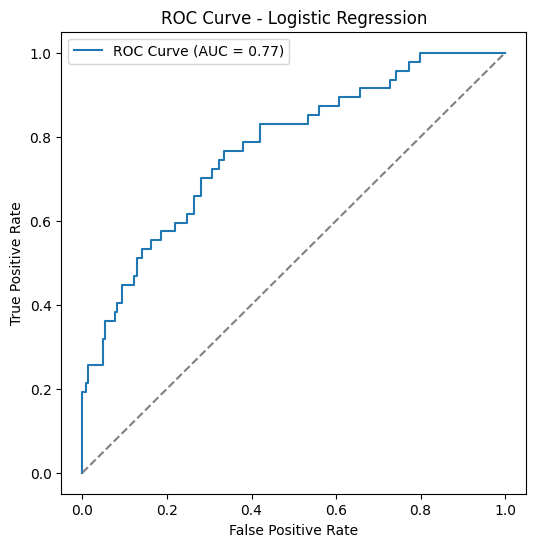

In [38]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.show()

In [39]:
# Feature coefficients interpretation
feature_importance = pd.Series(model.coef_[0], index=X_train.columns)
feature_importance.sort_values(ascending=False, inplace=True)
print("Top features positively associated with attrition:")
print(feature_importance.head(10))
print("\nTop features negatively associated with attrition:")
print(feature_importance.tail(10))

Top features positively associated with attrition:
JobRole_Sales Representative        1.221693
JobRole_Laboratory Technician       1.153189
EducationField_Human Resources      0.835912
BusinessTravel_Travel_Frequently    0.789899
OverTime_Yes                        0.753006
JobRole_Human Resources             0.527714
EducationField_Technical Degree     0.507046
MaritalStatus_Single                0.421053
JobLevel                            0.413996
JobRole_Sales Executive             0.320423
dtype: float64

Top features negatively associated with attrition:
JobSatisfaction                     -0.355317
YearsWithCurrManager                -0.397669
EnvironmentSatisfaction             -0.405556
JobRole_Manufacturing Director      -0.426047
JobRole_Manager                     -0.487695
JobRole_Healthcare Representative   -0.597888
OverTime_No                         -0.754037
EducationField_Other                -0.854098
BusinessTravel_Non-Travel           -0.911390
JobRole_Research D

## Logistic Regression Results

The logistic regression model achieved the following performance on the test set:

- **Accuracy:** 0.76
- **Precision:** 0.35
- **Recall:** 0.57
- **F1 Score:** 0.44
- **ROC AUC:** 0.77

The ROC curve demonstrates the model's ability to distinguish between employees likely to stay and those likely to leave, with an AUC of 0.77 indicating decent discrimination.

### Top Features Positively Associated with Attrition

| Feature                            | Coefficient |
| ----------------------------------- | ----------- |
| JobRole_Sales Representative        | 1.22        |
| JobRole_Laboratory Technician       | 1.15        |
| EducationField_Human Resources      | 0.84        |
| BusinessTravel_Travel_Frequently    | 0.79        |
| OverTime_Yes                        | 0.75        |
| JobRole_Human Resources             | 0.53        |
| EducationField_Technical Degree     | 0.51        |
| MaritalStatus_Single                | 0.42        |
| JobLevel                            | 0.41        |
| JobRole_Sales Executive             | 0.32        |

- *Employees in specific job roles (e.g. Sales Representative, Laboratory Technician), those who travel frequently for business, are single, or work overtime have a higher risk of attrition.*

### Top Features Negatively Associated with Attrition

| Feature                            | Coefficient |
| ----------------------------------- | ----------- |
| JobSatisfaction                     | -0.36       |
| YearsWithCurrManager                | -0.40       |
| EnvironmentSatisfaction             | -0.41       |
| JobRole_Manufacturing Director      | -0.43       |
| JobRole_Manager                     | -0.49       |
| JobRole_Healthcare Representative   | -0.60       |
| OverTime_No                         | -0.75       |
| EducationField_Other                | -0.85       |
| BusinessTravel_Non-Travel           | -0.91       |
| JobRole_Research Director           | -1.56       |

- *Higher job satisfaction, greater years with current manager, and roles such as Manager and Research Director are associated with lower attrition risk.*

---

These insights can be translated into actionable HR strategies, such as focusing retention programs on high-risk roles, offering support to new managers, or managing overtime more effectively for at-risk groups.


# 2. Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [41]:
# Initialize and cross-validate Random Forest (already handles imbalance with class_weight)
rfc = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(rfc, X_train, y_train, cv=cv, scoring='roc_auc')

print(f"Random Forest CV ROC AUC: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")


Random Forest CV ROC AUC: 0.806 ± 0.035


In [42]:
# Train on training data
rfc.fit(X_train, y_train)
y_pred_rf = rfc.predict(X_test)
y_prob_rf = rfc.predict_proba(X_test)[:,1]

print("Random Forest Test Classification Report:")
print(classification_report(y_test, y_pred_rf, digits=3))
print(f"Random Forest Test ROC AUC: {roc_auc_score(y_test, y_prob_rf):.3f}")

Random Forest Test Classification Report:
              precision    recall  f1-score   support

           0      0.856     0.984     0.915       247
           1      0.600     0.128     0.211        47

    accuracy                          0.847       294
   macro avg      0.728     0.556     0.563       294
weighted avg      0.815     0.847     0.803       294

Random Forest Test ROC AUC: 0.808


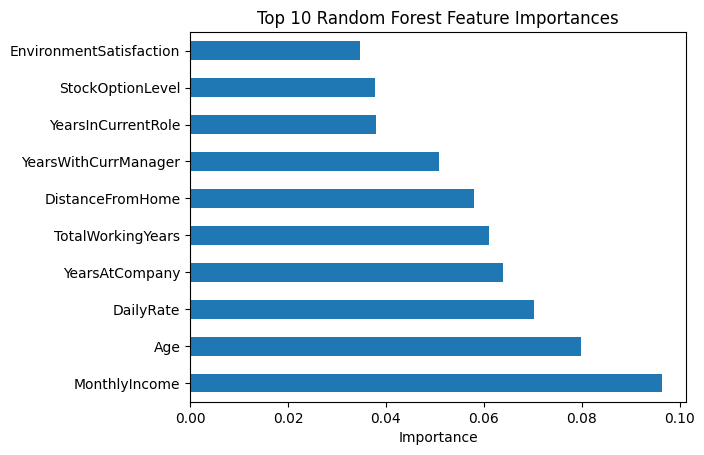

In [43]:
# Feature importances plot
import pandas as pd
import matplotlib.pyplot as plt
importances = pd.Series(rfc.feature_importances_, index=X_train.columns)
importances.sort_values(ascending=False).head(10).plot(kind='barh', title='Top 10 Random Forest Feature Importances')
plt.xlabel("Importance")
plt.show()

## Random Forest Model Performance

- **Cross-validated ROC AUC:** 0.81 ± 0.04
- **Test ROC AUC:** 0.81
- **Test Accuracy:** 0.85

**Confusion Matrix:**
- Precision for attrition (leavers): 0.60
- Recall for attrition (leavers): 0.13
- F1 score for attrition: 0.21

The model is better at identifying employees likely to stay (True Negatives), but less sensitive in catching all those likely to leave (True Positives). This is a common challenge in HR analytics due to class imbalance.

# 3. XGBoost

In [44]:
import xgboost as xgb

In [45]:
# Initialize XGBoost classifier (with class_weight workaround using scale_pos_weight)
# Calculate scale_pos_weight for imbalanced classes
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]

xgb_clf = xgb.XGBClassifier(
    objective='binary:logistic',
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

In [46]:
# Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(xgb_clf, X_train, y_train, cv=cv, scoring='roc_auc')
print(f"XGBoost CV ROC AUC: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")

XGBoost CV ROC AUC: 0.792 ± 0.047


In [47]:
# Train on full training set
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)
y_prob_xgb = xgb_clf.predict_proba(X_test)[:, 1]

print("XGBoost Test Classification Report:")
print(classification_report(y_test, y_pred_xgb, digits=3))
print(f"XGBoost Test ROC AUC: {roc_auc_score(y_test, y_prob_xgb):.3f}")

XGBoost Test Classification Report:
              precision    recall  f1-score   support

           0      0.878     0.960     0.917       247
           1      0.583     0.298     0.394        47

    accuracy                          0.854       294
   macro avg      0.731     0.629     0.656       294
weighted avg      0.831     0.854     0.833       294

XGBoost Test ROC AUC: 0.775


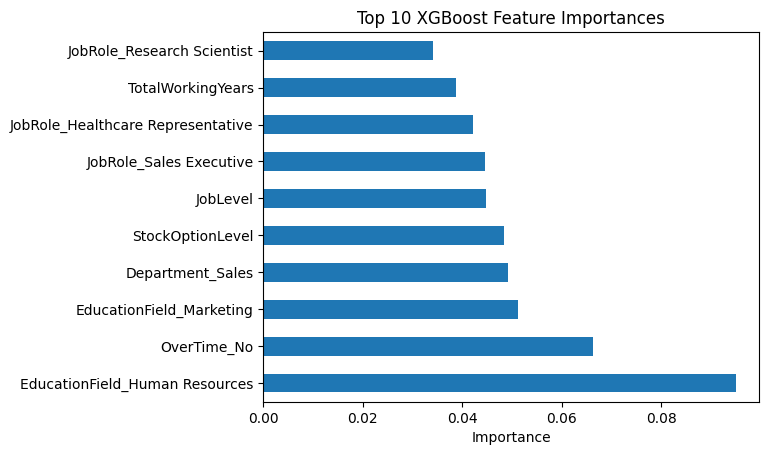

In [48]:
# Plot feature importances
importances = pd.Series(xgb_clf.feature_importances_, index=X_train.columns)
importances.sort_values(ascending=False).head(10).plot(kind='barh', title='Top 10 XGBoost Feature Importances')
plt.xlabel("Importance")
plt.show()

## XGBoost Model Results

- **Cross-validated ROC AUC:** 0.79 ± 0.05
- **Test ROC AUC:** 0.78
- **Test Accuracy:** 0.85

**Precision/Recall for Attrition (Class 1):**
- Precision: 0.58
- Recall: 0.30
- F1-score: 0.39

Compared to previous models, XGBoost captures more attrition cases (higher recall for leavers), though precision and recall still reflect the dataset's imbalance. Most employees who left were harder to predict, which is a typical HR analytics challenge.

### Top Feature Importances

| Feature                       | Importance |
|-------------------------------|------------|
| EducationField_Human Resources| Highest    |
| OverTime_No                   | High       |
| EducationField_Marketing      | High       |
| Department_Sales              | High       |
| StockOptionLevel              | Moderate   |
| JobLevel                      | Moderate   |
| JobRole_Sales Executive       | Moderate   |
| JobRole_Healthcare Representative | Moderate  |
| TotalWorkingYears             | Moderate   |
| JobRole_Research Scientist    | Moderate   |

- Consistent with previous models, features like department, job role, working years, education field, overtime status, and job level play a key role in attrition risk.

---

**Takeaways:**
- XGBoost offers modest gains in recall and interpretability.
- HR interventions can focus on at-risk roles, departments, and education backgrounds, as well as managing overtime for vulnerable groups.


# Hyperparameter GridSearch for XGBoost

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0]
}

xgb_clf = xgb.XGBClassifier(
    objective='binary:logistic',
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

grid_search = GridSearchCV(xgb_clf, param_grid, cv=3, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print(f"Best cross-validated ROC AUC: {grid_search.best_score_:.3f}")


Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
Best cross-validated ROC AUC: 0.799


In [51]:
# Refit best model on full train set
best_xgb = grid_search.best_estimator_
y_pred_best = best_xgb.predict(X_test)
y_prob_best = best_xgb.predict_proba(X_test)[:, 1]
print("Best XGBoost Test Classification Report:")
print(classification_report(y_test, y_pred_best, digits=3))
print(f"Best XGBoost Test ROC AUC: {roc_auc_score(y_test, y_prob_best):.3f}")

Best XGBoost Test Classification Report:
              precision    recall  f1-score   support

           0      0.888     0.960     0.922       247
           1      0.630     0.362     0.459        47

    accuracy                          0.864       294
   macro avg      0.759     0.661     0.691       294
weighted avg      0.846     0.864     0.848       294

Best XGBoost Test ROC AUC: 0.799


# Error Analysis

In [52]:
# Find indices for misclassified attrition cases
false_negatives = np.where((y_test == 1) & (y_pred_best == 0))[0]
false_positives = np.where((y_test == 0) & (y_pred_best == 1))[0]

print(f"False negatives (missed attrition cases): {len(false_negatives)}")
print(f"False positives (incorrectly flagged attrition): {len(false_positives)}")


False negatives (missed attrition cases): 30
False positives (incorrectly flagged attrition): 10


In [53]:
# Investigate false negatives and positives
missed_attrition = X_test.iloc[false_negatives]
flagged_stayers = X_test.iloc[false_positives]
print("Sample features for missed attrition cases:\n", missed_attrition.head())
print("Sample features for flagged stayers:\n", flagged_stayers.head())

Sample features for missed attrition cases:
           Age  DailyRate  DistanceFromHome  EnvironmentSatisfaction  \
69  -0.101159  -1.201090         -0.023755                 1.169781   
645 -0.867672  -1.144070         -1.010909                -0.660531   
985 -0.648668  -1.171340          1.580370                 1.169781   
136  1.541369   0.861523         -0.147150                -1.575686   
45   0.446350   1.382135          0.346427                -0.660531   

     JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  \
69        -1.026167 -0.961486         0.246200      -0.661856   
645       -1.026167 -0.961486         0.246200      -0.786794   
985        0.379672 -0.057788         0.246200      -0.068828   
136       -2.432006  0.845911         1.153254       0.881164   
45         0.379672  2.653309         0.246200       2.771161   

     StockOptionLevel  TotalWorkingYears  ...  JobRole_Manufacturing Director  \
69           0.241988          -1.193036  ...           

## Final Results and Insights

**Best XGBoost Parameters (Grid Search):**
- learning_rate: 0.1
- max_depth: 5
- n_estimators: 200
- subsample: 0.8
- Best cross-validated ROC AUC: 0.80

**Test Set Performance:**
- Accuracy: 0.86
- ROC AUC: 0.80
- Attrition (Leaver) Precision: 0.63
- Attrition Recall: 0.36
- Attrition F1: 0.46

The tuned XGBoost model outperforms previous models in overall accuracy and recall for predicting employees at risk of leaving. However, recall remains moderate, underscoring the inherent challenge of imbalanced HR data and the ambiguity in predicting all leavers.

### Error Analysis Findings

- **False negatives (missed attrition cases):** 30 out of 47 leavers
  - Many missed cases have low income, fewer working years, or belong to managerial and research roles.
  - Some missed attrition cases have high job satisfaction but still leave, revealing limits to feature-based prediction.
- **False positives (incorrect attrition alerts):** 10 cases flagged as leaving but actually stayed.
  - Some flagged stayers are new hires or in roles/fields frequently associated with higher attrition risk.

### Top Predictors (XGBoost Importance)

- EducationField (Human Resources, Marketing)
- OverTime status
- Department (Sales)
- JobRole (Sales Executive, Healthcare Rep, Research Scientist)
- Working years, job level, stock option level

## Actionable Recommendations

- **Retention Focus:** Target HR interventions for roles and departments with high predicted attrition risk (Sales, Human Resources).
- **Support Programs:** Address overtime, working years, and satisfaction for employees in at-risk segments.
- **Continuous Monitoring:** Track employees in flagged categories and update models as more data becomes available.
- **Model Improvement:** Future work should include exploring more complex ensembling, synthetic sampling, and developing HR dashboards integrating model predictions with business metrics.

---

**Limitations:** Models still miss a substantial number of true leavers, reflecting limitations in available features and inherent complexity of human career decisions.

